# 第三章 建造我们第一个神经网络

In [56]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import matplotlib.pyplot as plt

## 3.1 例子：添加层 def add_layer()

- 神经层里常见的参数通常有`weights、biases和激励函数`。

然后定义添加神经层的函数`def add_layer()`,它有四个参数：输入值、输入的大小、输出的大小和激励函数，我们设定默认的激励函数是`None`。
1. 定义weights

因为在生成初始参数时，随机变量(normal distribution)会比全部为0要好很多，所以我们这里的weights为一个in_size行, out_size列的随机变量矩阵。

2. 定义biases

在机器学习中，biases的推荐值不为0，所以我们这里是在0向量的基础上又加了0.1。

3. 定义神经网络未激活的值，预测值的初始值
4. 激活函数

激励函数为None时，输出就是当前的预测值——Wx_plus_b，不为None时，就把Wx_plus_b传到activation_function()函数中得到输出。

In [46]:
def add_layer(inputs, in_size, out_size, activation_function = None):
# 1. 定义weights和biases
# 
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1,out_size])+0.1)
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs

## 3.2 建造神经网络

### 3.2.1 导入数据

In [89]:
# 虚构数据
# x_data和y_data并不是严格的一元二次函数的关系，
# 多加了一个noise,这样看起来会更像真实情况。
x_data = np.linspace(-1,1, 300, dtype=np.float32)[:, np.newaxis]
noise = np.random.normal(0, 0.05, x_data.shape).astype(np.float32)
y_data = np.square(x_data) - 0.5 + noise

#利用占位符进行定义
#tf.placeholder()就是代表占位符，None代表无论输入有多少都可以
# 因为输入只有一个特征，所以这里是1。
xs = tf.placeholder(tf.float32, [None, 1])
ys = tf.placeholder(tf.float32, [None, 1])

# # 真实数据画散点图
# fig = plt.figure()
# ax = fig.add_subplot(1,1,1)
# ax.scatter(x_data, y_data)
# plt.ion() #plt.ion()用于连续显示
# plt.show()

### 3.2.2 搭建网络

通常神经层都包括输入层、隐藏层和输出层。这里的输入层只有一个属性， 所以我们就只有一个输入；隐藏层我们可以自己假设，这里我们假设隐藏层有10个神经元； 输出层和输入层的结构是一样的，所以我们的输出层也是只有一层。 所以，我们构建的是——输入层1个、隐藏层10个、输出层1个的神经网络。

In [90]:
# 定义隐藏层
# 使用 Tensorflow 自带的激励函数tf.nn.relu
l1 = add_layer(xs, 1, 10, activation_function=tf.nn.relu)

# 定义输出层
prediction = add_layer(l1,10,1, activation_function=None)

计算预测值prediction和真实值的误差，对二者差的平方求和再取平均。

In [91]:
loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - prediction),
                     reduction_indices=[1]))

接下来，是很关键的一步，如何让机器学习提升它的准确率。`tf.train.GradientDescentOptimizer()`中的值通常都小于1，这里取的是0.1，代表以`0.1的效率来最小化误差loss。`

In [92]:
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

使用变量时，都要对它进行初始化，这是必不可少的。

In [93]:
# init = tf.initialize_all_variables() # tf 马上就要废弃这种写法
init = tf.global_variables_initializer()  # 替换成这样就好

定义Session，并用 Session 来执行 init 初始化步骤。 （注意：在tensorflow中，`只有session.run()才会执行我们定义的运算。`）

In [94]:
sess = tf.Session()
sess.run(init)

### 3.2.3 训练

比如这里，我们让机器学习1000次。机器学习的内容是`train_step`, `用 Session 来 run 每一次 training 的数据，逐步提升神经网络的预测准确性`。 (注意：当运算要用到placeholder时，就需要feed_dict这个字典来指定输入。)

每隔50次训练刷新一次图形，用红色、宽度为5的线来显示我们的预测数据和输入之间的关系，并暂停0.1s。

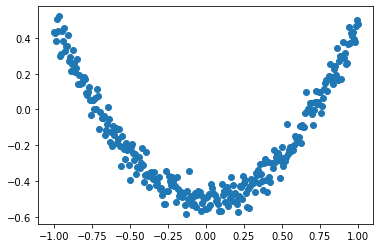

0.2206337
0.009147788
0.006960702
0.0060257786
0.0053331326
0.0049000294
0.0045390646
0.004310864
0.0041259667
0.003952106
0.0038071594
0.003605138
0.0033845683
0.0032649445
0.0032246998
0.0032037084
0.003191577
0.0031844673
0.0031751392
0.0031678046


In [95]:
# 真实数据画散点图
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x_data, y_data)
plt.ion() #plt.ion()用于连续显示
plt.show()
for i in range(1000):
    sess.run(train_step,feed_dict={xs:x_data,ys:y_data})
    # 每50步我们输出一下机器学习的误差。
    # 每隔50次训练刷新一次图形，用红色、宽度为5的线来显示我们的预测数据和输入之间的关系，并暂停0.1s。
    if i % 50 == 0:
        print(sess.run(loss,feed_dict={xs:x_data,ys:y_data}))
        try:
            ax.lines.remove(lines[0])
        except Exception:
            pass
        prediction_value = sess.run(prediction, feed_dict={xs:x_data, ys:y_data})
        lines = ax.plot(x_data, prediction_value, 'r-', lw=5)
        plt.pause(0.1)

plt.pause(0) # 完成运行后图片不消失

**--此处代码Pycharm正常运行--**

## 3.3 结果可视化

## 3.4 加速神经网络训练

Tensorflow 中的优化器会有很多不同的种类。最基本, 也是最常用的一种就是GradientDescentOptimizer。

## 3.5 优化器 optimizer

在Google搜索中输入“tensorflow optimizer可以看到Tensorflow提供了7种优化器

各种优化器的特点https://mofanpy.com/tutorials/machine-learning/tensorflow/intro-speed-up-learning/
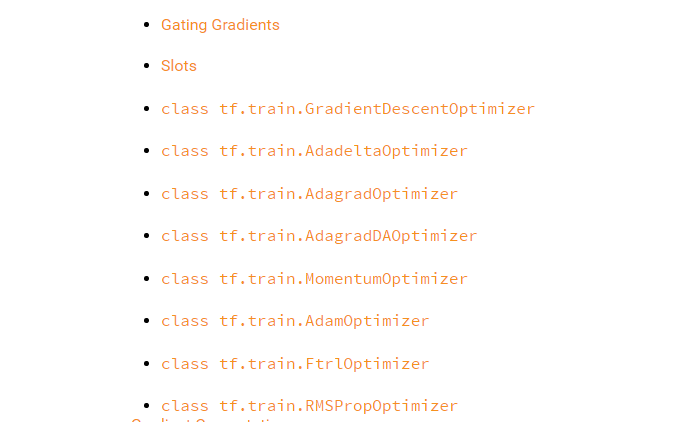